In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_percentage_error

from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [2]:
train = pd.read_csv("train3.csv", decimal=',')
test = pd.read_csv("test3.csv", decimal=',')
test["id"] = 0

train_ = train.drop(columns=["price"])
# test = test.drop()
# X = sm.add_constant(X)
# test = sm.add_constant(test)
y = train["price"]

In [3]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27532 entries, 0 to 27531
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27532 non-null  int64 
 1   region        27532 non-null  int64 
 2   year          27532 non-null  int64 
 3   manufacturer  27532 non-null  int64 
 4   condition     27532 non-null  int64 
 5   cylinders     27532 non-null  int64 
 6   fuel          27532 non-null  object
 7   odometer      27532 non-null  int64 
 8   title_status  27532 non-null  object
 9   transmission  27532 non-null  int64 
 10  drive         27532 non-null  int64 
 11  size          27532 non-null  int64 
 12  type          27532 non-null  object
 13  paint_color   27532 non-null  int64 
 14  state         27532 non-null  object
 15  year2         27532 non-null  int64 
 16  odometer2     27532 non-null  int64 
 17  year3         27532 non-null  int64 
 18  odometer3     27532 non-null  int64 
 19  year

(array([ 302.,  795., 2350., 4547., 6474., 3472., 6130., 2668.,  621.,
         173.]),
 array([ 6.91274282,  7.36952839,  7.82631396,  8.28309953,  8.73988511,
         9.19667068,  9.65345625, 10.11024182, 10.56702739, 11.02381296,
        11.48059853]),
 <BarContainer object of 10 artists>)

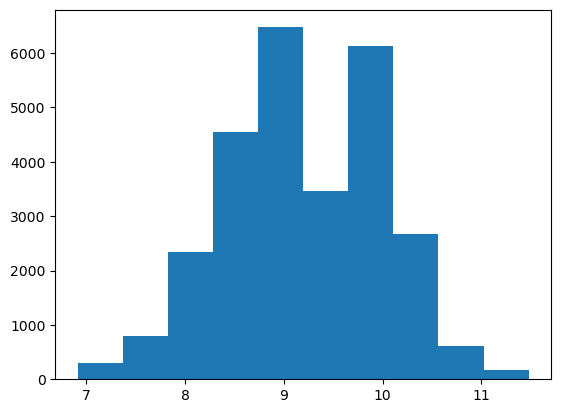

In [4]:
plt.hist(np.log1p(y))

In [5]:
# df_num['title_status']=np.where(df_num['title_status'].isnull()==True,df_num['title_status'].median(),df_num['title_status'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_, y, test_size=0.3)
bcy = boxcox(y_train)
logy = np.log1p(y_train)

In [7]:
categorical_indices= ["paint_color", "fuel", "drive", "size", "type"] 
# categorical_indices=['region', 'manufacturer', 'condition', 'cylinders', 'fuel',
#        'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
#        'state']
# ['id', "region", "manufacturer", "title_status", "transmission", "state", "odometer4"]

In [8]:
catboost = CatBoostRegressor(loss_function='MAPE')

In [9]:
catboost.fit(X_train, logy)

0:	learn: 0.0715285	total: 527ms	remaining: 8m 46s
1:	learn: 0.0707828	total: 532ms	remaining: 4m 25s
2:	learn: 0.0700403	total: 537ms	remaining: 2m 58s
3:	learn: 0.0693718	total: 542ms	remaining: 2m 14s
4:	learn: 0.0687279	total: 546ms	remaining: 1m 48s
5:	learn: 0.0680749	total: 551ms	remaining: 1m 31s
6:	learn: 0.0674538	total: 554ms	remaining: 1m 18s
7:	learn: 0.0668484	total: 558ms	remaining: 1m 9s
8:	learn: 0.0662945	total: 561ms	remaining: 1m 1s
9:	learn: 0.0657200	total: 566ms	remaining: 56s
10:	learn: 0.0652057	total: 570ms	remaining: 51.2s
11:	learn: 0.0646713	total: 573ms	remaining: 47.2s
12:	learn: 0.0641809	total: 577ms	remaining: 43.8s
13:	learn: 0.0636998	total: 581ms	remaining: 40.9s
14:	learn: 0.0632848	total: 585ms	remaining: 38.4s
15:	learn: 0.0628340	total: 589ms	remaining: 36.2s
16:	learn: 0.0624065	total: 592ms	remaining: 34.2s
17:	learn: 0.0619790	total: 596ms	remaining: 32.5s
18:	learn: 0.0616085	total: 600ms	remaining: 31s
19:	learn: 0.0612037	total: 604ms	rema

In [10]:
# y_pred=inv_boxcox(catboost.predict(X_test), bcy[1])
yy = catboost.predict(X_test)
logy_pred = np.exp(yy) - 1

In [11]:
score = mean_absolute_percentage_error(y_test, logy_pred) * 100

In [12]:
score

52.46530976120516

In [13]:
((np.log1p(logy_pred) - np.log1p(y_test)) < 0).sum()

4121

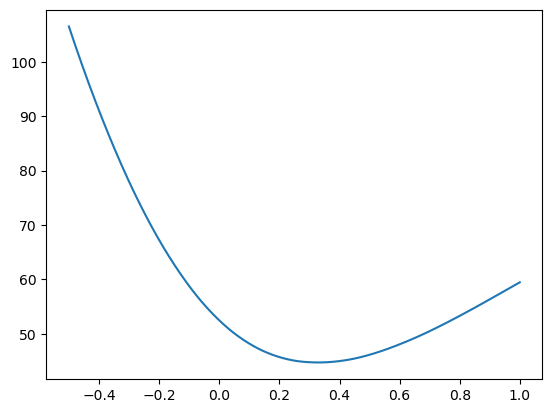

0.3305000000000007 :  44.72090542532941


In [14]:
ii = np.arange(-.5, 1, 0.0005)
ind = 0
mi = 999
ss = []
for i in ii:
    logy_pred = np.exp(yy - i) - 1
    s = mean_absolute_percentage_error(y_test, logy_pred) * 100
    ss.append(s)
    if s < mi:
        mi = s
        ind = i
plt.plot(ii, ss)
plt.show()
print(ind, ": ", mi)

In [15]:
logy_pred = np.exp(yy - ind) - 1
mean_absolute_percentage_error(y_test, logy_pred) * 100

44.72090542532941

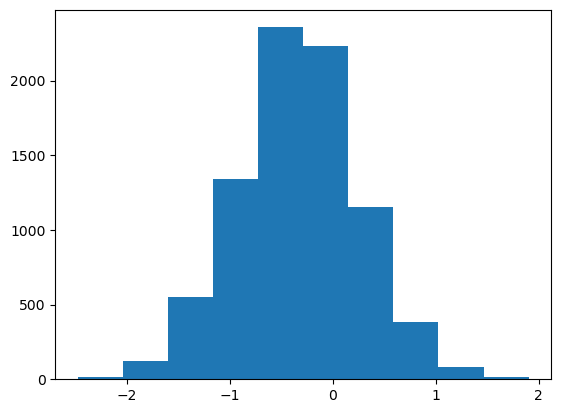

In [17]:
logy_pred = np.exp(yy - ind) - 1
plt.hist(np.log1p(logy_pred) - np.log1p(y_test))
plt.show()

In [18]:
submit = pd.read_csv("submit_sample.csv", header=None)

yy = catboost.predict(test)
logy_pred = np.exp(yy - ind) - 1
submit[1] = logy_pred

In [19]:
submit

,0,1
0,27532,7426.037349
1,27533,4803.912455
2,27534,4440.185761
3,27535,19550.647134
4,27536,5709.373478
...,...,...
27532,55064,11075.421575
27533,55065,11375.462319
27534,55066,8214.563675
27535,55067,5649.491255


In [20]:
#submission.csvでデータを保存(提出様式はindex=False, header=Noneとなります。)
submit.to_csv("submit_sample.csv", index=False, header=None)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27532 entries, 0 to 27531
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27532 non-null  int64 
 1   region        27532 non-null  int64 
 2   year          27532 non-null  int64 
 3   manufacturer  27532 non-null  int64 
 4   condition     27532 non-null  int64 
 5   cylinders     27532 non-null  int64 
 6   fuel          27532 non-null  object
 7   odometer      27532 non-null  int64 
 8   title_status  27532 non-null  object
 9   transmission  27532 non-null  int64 
 10  drive         27532 non-null  int64 
 11  size          27532 non-null  int64 
 12  type          27532 non-null  object
 13  paint_color   27532 non-null  int64 
 14  state         27532 non-null  object
 15  price         27532 non-null  int64 
 16  year2         27532 non-null  int64 
 17  odometer2     27532 non-null  int64 
 18  year3         27532 non-null  int64 
 19  odom